In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [2]:
kuan = fb[fb.page_name == "管碧玲 (kuanbiling)"]
# 把時間格式轉換
kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
kuan['month_year'] = pd.to_datetime(kuan['new_date']).dt.to_period('M')

kuan.head(1)

<ipython-input-2-7c5bb8d47572>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
<ipython-input-2-7c5bb8d47572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-2-7c5bb8d47572>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10836,112542652141599_2285548514840991,112542652141599,管碧玲 (kuanbiling),政治人物,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,photo,https://www.facebook.com/112542652141599/posts/2285548514840991/,2019-01-12T23:00:36+0000,2019-01-13T07:00:36,...,0,0,0,0,0,302,256,2019-01-13,7,2019-01


In [3]:
kuan[kuan.created_time_taipei == max(kuan.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
11322,112542652141599_2950527061676463,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,NaN,photo,https://www.facebook.com/112542652141599/posts/2950527061676463/,2020-01-10T14:09:40+0000,2020-01-10T22:09:40,...,0,0,0,0,0,69,27,2020-01-10,22,2020-01


In [4]:
kuan[kuan.created_time_taipei == min(kuan.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10855,112542652141599_2268074893255020,112542652141599,管碧玲 (kuanbiling),政治人物,201❾ 祝福大家\n幸福❾❾！,NaN,photo,https://www.facebook.com/112542652141599/posts/2268074893255020/,2019-01-01T02:41:57+0000,2019-01-01T10:41:57,...,0,0,0,0,0,10,1,2019-01-01,10,2019-01


In [5]:
kuan = kuan.sort_values(by=['like_count'])
kuan

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
11339,112542652141599_2941161235946379,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2941161235946379/,2020-01-06T07:18:54+0000,2020-01-06T15:18:54,...,0,0,0,0,0,1,0,2020-01-06,15,2020-01
11347,112542652141599_2932276656834837,112542652141599,管碧玲 (kuanbiling),政治人物,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\n永遠守護他們！\n引領與守護，\n變成一種永恆！,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2932276656834837/,2020-01-02T08:07:16+0000,2020-01-02T16:07:16,...,0,0,0,0,0,1,1,2020-01-02,16,2020-01
10889,112542652141599_245177136367215,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 加入了封面影片。,video,https://www.facebook.com/biling.kuan/videos/245177136367215/,2019-02-28T12:25:36+0000,2019-02-28T20:25:36,...,0,0,0,0,0,2,4,2019-02-28,20,2019-02
10966,112542652141599_2455195337876307,112542652141599,管碧玲 (kuanbiling),政治人物,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/1770605486509984/videos/441773279910666/,管碧玲 (kuanbiling),video,https://www.facebook.com/112542652141599/posts/2455195337876307/,2019-05-03T12:07:05+0000,2019-05-03T20:07:05,...,0,0,0,0,0,5,1,2019-05-03,20,2019-05
10869,112542652141599_2293359050726604,112542652141599,管碧玲 (kuanbiling),政治人物,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.facebook.com/gogogoeball/videos/410991816307519/,管碧玲 (kuanbiling) 從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/112542652141599/posts/2293359050726604/,2019-01-18T01:44:32+0000,2019-01-18T09:44:32,...,0,0,0,0,0,5,1,2019-01-18,9,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11239,112542652141599_2830495630346274,112542652141599,管碧玲 (kuanbiling),政治人物,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新北今年的目標已經達標，但達標不是一個目的，最近台商回來蠻多，新北已服務39家回流台商，預估投資金額超過3800億元，已落實超過1000億元，創造超過1萬8千個就業機會。～～～」,NaN,photo,https://www.facebook.com/112542652141599/posts/2830495630346274/,2019-11-19T09:35:56+0000,2019-11-19T17:35:56,...,0,0,0,0,0,275,800,2019-11-19,17,2019-11
11357,112542652141599_2925130817549421,112542652141599,管碧玲 (kuanbiling),政治人物,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果，因為時代力量要求變更議程，要把「礦業法」放進來，一時，出現議程因此被操作的危機，對於明天能不能順利進行表決大戰，出現危機。\n我和周春米委員，只好預防性的開始排隊！\n\n最後，因為協商結論反對黨都沒有簽字，我們為了以防萬一，只好在議場排隊備戰。\n\n再更新：我們最後願意相信院長協商時的裁示會被尊重，因此我們撤離議場的排隊！,NaN,photo,https://www.facebook.com/112542652141599/posts/2925130817549421/,2019-12-30T08:18:20+0000,2019-12-30T16:18:20,...,0,0,0,0,0,1356,875,2019-12-30,16,2019-12
11299,112542652141599_2905408216188348,112542652141599,管碧玲 (kuanbiling),政治人物,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！\nWecare主辦單位粗估遊行人數已達30萬。,NaN,video,https://www.facebook.com/112542652141599/posts/2905408216188348/,2019-12-21T06:56:14+0000,2019-12-21T14:56:14,...,0,0,0,0,0,229,150,2019-12-21,14,2019-12
11245,112542652141599_2823264467736057,112542652141599,管碧玲 (kuanbiling),政治人物,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,NaN,photo,https://www.facebook.com/112542652141599/posts/2823264467736057/,2019-11-16T10:13:21+0000,2019-11-16T18:13:21,...,0,0,0,0,0,288,134,2019-11-16,18,2019-11


In [6]:
kuan.reset_index(inplace=True)
kuan

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
0,11339,112542652141599_2941161235946379,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2941161235946379/,2020-01-06T07:18:54+0000,...,0,0,0,0,0,1,0,2020-01-06,15,2020-01
1,11347,112542652141599_2932276656834837,112542652141599,管碧玲 (kuanbiling),政治人物,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\n永遠守護他們！\n引領與守護，\n變成一種永恆！,管碧玲 (kuanbiling) 更新了封面相片。,photo,https://www.facebook.com/112542652141599/posts/2932276656834837/,2020-01-02T08:07:16+0000,...,0,0,0,0,0,1,1,2020-01-02,16,2020-01
2,10889,112542652141599_245177136367215,112542652141599,管碧玲 (kuanbiling),政治人物,NaN,管碧玲 (kuanbiling) 加入了封面影片。,video,https://www.facebook.com/biling.kuan/videos/245177136367215/,2019-02-28T12:25:36+0000,...,0,0,0,0,0,2,4,2019-02-28,20,2019-02
3,10966,112542652141599_2455195337876307,112542652141599,管碧玲 (kuanbiling),政治人物,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/1770605486509984/videos/441773279910666/,管碧玲 (kuanbiling),video,https://www.facebook.com/112542652141599/posts/2455195337876307/,2019-05-03T12:07:05+0000,...,0,0,0,0,0,5,1,2019-05-03,20,2019-05
4,10869,112542652141599_2293359050726604,112542652141599,管碧玲 (kuanbiling),政治人物,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.facebook.com/gogogoeball/videos/410991816307519/,管碧玲 (kuanbiling) 從「會做事 繼續衝」分享了 1 段影片。,video,https://www.facebook.com/112542652141599/posts/2293359050726604/,2019-01-18T01:44:32+0000,...,0,0,0,0,0,5,1,2019-01-18,9,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,11239,112542652141599_2830495630346274,112542652141599,管碧玲 (kuanbiling),政治人物,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新北今年的目標已經達標，但達標不是一個目的，最近台商回來蠻多，新北已服務39家回流台商，預估投資金額超過3800億元，已落實超過1000億元，創造超過1萬8千個就業機會。～～～」,NaN,photo,https://www.facebook.com/112542652141599/posts/2830495630346274/,2019-11-19T09:35:56+0000,...,0,0,0,0,0,275,800,2019-11-19,17,2019-11
524,11357,112542652141599_2925130817549421,112542652141599,管碧玲 (kuanbiling),政治人物,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果，因為時代力量要求變更議程，要把「礦業法」放進來，一時，出現議程因此被操作的危機，對於明天能不能順利進行表決大戰，出現危機。\n我和周春米委員，只好預防性的開始排隊！\n\n最後，因為協商結論反對黨都沒有簽字，我們為了以防萬一，只好在議場排隊備戰。\n\n再更新：我們最後願意相信院長協商時的裁示會被尊重，因此我們撤離議場的排隊！,NaN,photo,https://www.facebook.com/112542652141599/posts/2925130817549421/,2019-12-30T08:18:20+0000,...,0,0,0,0,0,1356,875,2019-12-30,16,2019-12
525,11299,112542652141599_2905408216188348,112542652141599,管碧玲 (kuanbiling),政治人物,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！\nWecare主辦單位粗估遊行人數已達30萬。,NaN,video,https://www.facebook.com/112542652141599/posts/2905408216188348/,2019-12-21T06:56:14+0000,...,0,0,0,0,0,229,150,2019-12-21,14,2019-12
526,11245,112542652141599_2823264467736057,112542652141599,管碧玲 (kuanbiling),政治人物,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,NaN,photo,https://www.facebook.com/112542652141599/posts/2823264467736057/,2019-11-16T10:13:21+0000,...,0,0,0,0,0,288,134,2019-11-16,18,2019-11


結巴斷詞 jieba

len(liu): 看劉櫂豪的貼文總共有幾筆
list(liu['message']): 把要斷詞的內容轉成 list 格式
創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [7]:
doc_names = range(len(kuan)) #管碧玲有幾篇文章
doc_names

range(0, 528)

In [8]:
import numpy as np
kuan = kuan.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(kuan['message'])
kuan_docs = pd.DataFrame(columns=['jieba_results'])
kuan_docs['jieba_results'] = kuan_docs['jieba_results'].astype('str')

In [9]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yangs\AppData\Local\Temp\jieba.cache
Loading model cost 0.632 seconds.
Prefix dict has been built successfully.


['願', '罹難', '的', '英雄', '們', '安息', '！', '\n', '您', '們', '正要', '傳送長', '官', '對', '辛苦', '弟兄', '的', '愛與', '期許', '，', '\n', '路途', '中', '，', '\n', '幻化', '為', '天使', '，', '\n', '永遠守護', '他們', '！', '\n', '引領', '與', '守護', '，', '\n', '變成', '一種', '永恆', '！']


In [10]:
words = jieba.lcut(text_list[527], cut_all = False)
print(words)

['公務員', '感動', '的', '見證', '：', '我們', '家', '不', '搞', '特權', '！', '\n', '\n', '我', '擔任', '立委', '14', '年', '，', '老公', '「', '無薪', '階級', '」', '11', '年', '。', '他', '不', '搞', '官位', '、', '不', '搞', '獨董', '、', '也', '不', '當民間', '企業', '的', '顧問', '；', '甚至', '去', '找個', '相關', '的', '職業', '工會', '補', '四年', '的', '勞保年資', '，', '都', '不願', '為', '。', '\n', '「', '君子', '慎獨', '」', '！', '在', '沒', '有人', '看', '得到', '的', '地方', '，', '我們', '家', '都', '自持', '甚嚴', '。', '\n', '女婿', '追', '隨指導', '教授', '擔任', '機要', '在', '先', '，', '娶', '我', '女兒', '在', '後', '，', '不是', '因為', '我', '的', '特權', '，', '我', '特別', '再', '說明', '一次', '。', '\n', '9', '/', '18', '媒體', '炒作', '女婿', '特權', '時', '，', '有', '一個', '勞保局', '的', '官員', '，', '9', '/', '19', '就', '在', '他', '參加', '的', '群', '組公開', '作見證', '，', '公務員', '看', '多', '了', '，', '他', '從', '老公', '勞保年', '金', '怎麼領', '，', '清楚', '看到', '這是', '一個', '不', '搞', '特權', '的', '家庭', '！', '\n', '他', '說', '老公', '的', '勞保年', '金比', '家庭', '主婦', '還少', '，', '他', '感動', '的', '為', '我', '不', '搞', '特權', '作見證', '。', '\n', '說', '我'

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [11]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    kuan_docs = kuan_docs.append(s, ignore_index=True)#每次的斷詞結果都加回kuan_docs

In [12]:
kuan_docs

,jieba_results
0,
1,願 罹難 的 英雄 們 安息 您 們 正要 傳送 長官 對 辛苦 弟兄 的 愛與 期許 路途 中 幻化 為 天使 永遠守護 他們 引領 與 守護 變成 一種 永恆 ！
2,
3,母親節 話家常 聊得 很快 樂 / / . . / / / /
4,開放 政府 行動 內閣 我們 這樣 做 人民 會 瞭解 我們 支持 我們 / / . . / / / /
...,...
523,難道 侯友宜 是 韓國瑜 的 剋星 這是 / 眾多 媒體 的 報導 侯友宜 表示 新北 今年 的 目標 已 經達標 但達標 不是 一個 目的 最近 台商 回來 蠻 多 新北 已 服務 家 回流 台商 預估 投資金額 超過 億元 已落 實超過 億元 創造 超過 萬 千個 就業機會 。 」
524,非常 非常 努力 的 捍衛 反滲透法 好不容易 討論 完條文 多麼 害怕 明天 的 議程 又 會 節外 生枝 結果 因為 時代 力量 要求 變 更 議程 要 把 礦業法 放進 來 一時 出現 議程 因此 被 操作 的 危機 對 於 明天 能 不能 順利 進行表 決大戰 出現 危機 。 我 和 周春米 委員 只好 預防性 的 開始 排隊 最 後 因為 協商 結論 反 對 黨 都 沒 有 簽字 我們 為 了 以防 萬一 只好 在 議場 排隊 備戰 。 再 更新 我們 最後願意 相信 院長 協商時 的 裁示 會 被 尊重 因此 我們 撤離 議場 的 排隊 ！
525,分 了 第九 大隊 才 剛剛 開始 出發 第一 大隊 已經 經過 中央公園 光復高雄 氣勢 驚人 主辦 單位 粗估 遊 行人 數已 達 萬 。
526,人山人海 . 萬人 在 線上 我們 的 熱情 預告 光復高雄 ！


In [13]:
kuan['jieba_results'] = kuan_docs
kuan_post = kuan[['new_date','message','jieba_results','like_count']]
kuan_post


,new_date,message,jieba_results,like_count
0,2020-01-06,,,13
1,2020-01-02,願罹難的英雄們安息！\n您們正要傳送長官對辛苦弟兄的愛與期許，\n路途中，\n幻化為天使，\n永遠守護他們！\n引領與守護，\n變成一種永恆！,願 罹難 的 英雄 們 安息 您 們 正要 傳送 長官 對 辛苦 弟兄 的 愛與 期許 路途 中 幻化 為 天使 永遠守護 他們 引領 與 守護 變成 一種 永恆 ！,14
2,2019-02-28,,,50
3,2019-05-03,母親節話家常，聊得很快樂\n\nhttps://www.facebook.com/1770605486509984/videos/441773279910666/,母親節 話家常 聊得 很快 樂 / / . . / / / /,66
4,2019-01-18,「開放政府，行動內閣」，我們這樣做，人民會瞭解我們，支持我們！\nhttps://www.facebook.com/gogogoeball/videos/410991816307519/,開放 政府 行動 內閣 我們 這樣 做 人民 會 瞭解 我們 支持 我們 / / . . / / / /,94
...,...,...,...,...
523,2019-11-19,難道侯友宜是韓國瑜的剋星？\n\n這是10/22眾多媒體的報導：\n\n「～～侯友宜表示，新北今年的目標已經達標，但達標不是一個目的，最近台商回來蠻多，新北已服務39家回流台商，預估投資金額超過3800億元，已落實超過1000億元，創造超過1萬8千個就業機會。～～～」,難道 侯友宜 是 韓國瑜 的 剋星 這是 / 眾多 媒體 的 報導 侯友宜 表示 新北 今年 的 目標 已 經達標 但達標 不是 一個 目的 最近 台商 回來 蠻 多 新北 已 服務 家 回流 台商 預估 投資金額 超過 億元 已落 實超過 億元 創造 超過 萬 千個 就業機會 。 」,6730
524,2019-12-30,非常非常努力的捍衛「反滲透法」，好不容易討論完條文，多麼害怕明天的議程又會節外生枝！\n結果，因為時代力量要求變更議程，要把「礦業法」放進來，一時，出現議程因此被操作的危機，對於明天能不能順利進行表決大戰，出現危機。\n我和周春米委員，只好預防性的開始排隊！\n\n最後，因為協商結論反對黨都沒有簽字，我們為了以防萬一，只好在議場排隊備戰。\n\n再更新：我們最後願意相信院長協商時的裁示會被尊重，因此我們撤離議場的排隊！,非常 非常 努力 的 捍衛 反滲透法 好不容易 討論 完條文 多麼 害怕 明天 的 議程 又 會 節外 生枝 結果 因為 時代 力量 要求 變 更 議程 要 把 礦業法 放進 來 一時 出現 議程 因此 被 操作 的 危機 對 於 明天 能 不能 順利 進行表 決大戰 出現 危機 。 我 和 周春米 委員 只好 預防性 的 開始 排隊 最 後 因為 協商 結論 反 對 黨 都 沒 有 簽字 我們 為 了 以防 萬一 只好 在 議場 排隊 備戰 。 再 更新 我們 最後願意 相信 院長 協商時 的 裁示 會 被 尊重 因此 我們 撤離 議場 的 排隊 ！,6876
525,2019-12-21,2:55分了，第九大隊才剛剛開始出發！\n第一大隊已經經過中央公園！\n光復高雄，氣勢驚人！\nWecare主辦單位粗估遊行人數已達30萬。,分 了 第九 大隊 才 剛剛 開始 出發 第一 大隊 已經 經過 中央公園 光復高雄 氣勢 驚人 主辦 單位 粗估 遊 行人 數已 達 萬 。,7455
526,2019-11-16,人山人海，\n2.1萬人在線上，\n我們的熱情，\n預告光復高雄！,人山人海 . 萬人 在 線上 我們 的 熱情 預告 光復高雄 ！,8008


In [14]:
import matplotlib.pyplot as plt

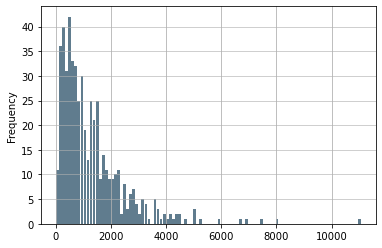

In [15]:
commutes = kuan_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [16]:
temp = kuan_post[(kuan_post['like_count'] <= 1000) & (kuan_post['like_count'] > 500)]
temp

,new_date,message,jieba_results,like_count
135,2020-01-01,新年快樂！,新年 快樂 ！,502
136,2019-05-24,我尊敬的朋友：中山大學社會系主任，王宏仁教授今天早上與市府官員的另一半，登記結婚了。\n我祝福他們幸福美滿，特別高興，恭喜他們！\n\n20190517 Speech of DPP Kuanbiling@Congress regarding same-sex marriage bill\nhttps://youtu.be/Ybk1-lC8ttE,我 尊敬 的 朋友 中山大學 社會 系主任 王 宏仁 教授 今天 早上 與 市府 官員 的 另一半 登記 結婚 了 。 我 祝福 他們 幸福 美滿 特別 高興 恭喜 他們 @ - / / . / -,503
137,2019-09-11,明天晚上要和昆澤委員合唱什麼歌呢？\n正在躊謀～～～\n\n對了，\n歡迎大家相招來𨑨迌ㄋㄟ\n～～～～,明天 晚上 要 和 昆澤 委員 合唱 什麼 歌 呢 正在 躊謀 對 了 歡迎 大家 相招來 𨑨 迌 ㄋ ㄟ ～,506
138,2019-04-16,,,508
139,2019-05-08,聲援簡煥宗議員！\n所有正義的力量，應該團結對抗霸權！,聲援 簡煥宗議員 所有 正義的 力量 應該 團結 對 抗霸權 ！,508
...,...,...,...,...
275,2019-07-17,布朗大方傳愛給台灣；\n首相：會在聯合國支持台灣\n\n在WHA為台灣強力發聲，台灣熱血的好朋友布朗向大家問好 !\n\n隨總統出訪，風塵僕僕，來到邦交國聖文森，特別向在世衛大會為台灣仗義執言的衛生部長布朗先生致謝。我們三位立委，紛紛向他握手致謝！\n布朗先生十分大方熱情，並且再熱情的為台灣同胞錄ㄧ段問候的話、與對兩國邦誼的期許！\n\n他向台灣的朋友打招呼，並且說：「我們從聖文森傳遞所有的愛給台灣⋯⋯」\n\n聖文森剛剛當選聯合國安理會的非常任理事國，未來我們將有一個邦交國在安理會了。鞏薩福首相未來將是出席安理會的成員，今天他致詞時說，他會在聯合國支持我們。\n\n和總統拼外交，深刻體會外交工作的重要與艱辛！\n我們會加油，請您為我們加油！,布朗 大方 傳愛給 台灣 首相 會 在 聯合國 支持 台灣 在 為 台灣 強力 發聲 台灣 熱血 的 好 朋友 布朗 向 大家 問好 隨總統 出訪 風塵 僕僕 來 到 邦交國 聖文森 特別 向 在世 衛大會 為 台灣 仗 義執言 的 衛生 部長 布朗 先生 致謝 。 我們 三位 立委 紛紛 向 他 握手 致謝 布朗 先生 十分 大方 熱情 並且 再 熱情 的 為 台灣 同胞 錄 ㄧ 段 問候 的 話 與 對 兩國邦誼 的 期許 他 向 台灣 的 朋友 打招呼 並且 說 我們 從 聖文森 傳遞 所有 的 愛給 台灣 ⋯ ⋯ 聖文森 剛剛 當選 聯合國 安理會 的 非 常任理事 國 未來 我們 將有 一個 邦交國 在 安理會 了 。 鞏薩福 首相 未來 將是 出席 安理會 的 成員 今天 他致 詞時 說 他會 在 聯合國 支持 我們 。 和 總統 拼 外交 深刻 體會 外交 工作 的 重要 與 艱辛 我們 會 加油 請 您 為 我們 加油 ！,994
276,2019-12-11,昨天通過大量歷史性的改革法案之後，\n今天「出征」到雲林，\n2020國會過半，\n改革才能繼續！\n加油加油啊！,昨天 通過 大量 歷史性 的 改革 法案 之 後 今天 出征 到 雲林 國會 過半 改革 才能 繼續 加油 加油 啊 ！,995
277,2019-11-27,違法荒謬劇，恕不奉陪！\n\n就在明天，立法院教育文化委員會，將上演一場荒謬劇！\n委員會召委替有選情考量需要的委員，排了一個政治操作的造謠抹黑公聽會，召委高金素梅，發包給陳學聖委員主持，以完全違反立法院職權行使法規定的方式，公器私用，邀請彭文正、賀德芬來針對蔡英文總統的論文攻擊！\n民進黨黨團決定，我們不奉陪！\n自嗨自玩的荒謬劇，我們拒絕奉陪！\n\n依據立法院職權行使法第五十四條規定，立法院各常設委員會舉行公聽會，須為審查院會交付之議案，得依憲法第六十七條第二項之規定舉行公聽會。也就是公聽會之舉行，係為廣聽專家、學者、社會代表等各界意見，以提供審議議案之立法形成之參考(參照「立法院職權行使法」 第59條 公聽會報告作為審查該特定議案之參考。)；委員會公聽會之舉行實有法定要件；絕不容許僅為遂行政治上抹黑行徑，以私設刑堂方式，來恣意濫用。\n\n 11月28日(四)原該日教育及文化委員會主席為高金素梅委員，但高金委員安排一場名為「確立違反學術倫理案件客觀公正之處理原則」公聽會，但從日前議程安排，乃至當日的會議主席係由陳學聖委員擔任，顯已違反立法院職權行使法、立法院各委員會組織法相關規定；此外，公聽會題綱更是通篇針對蔡英文總統的論文，不僅文不對題，甚至是假公聽會，為個人選舉搭造舞台，意在遂行政治抹黑，此種濫用立委職權之舉措，綁架教育委員會，實不足取，本黨團無意奉陪。\n 特此聲明！,違法 荒謬劇 恕不奉陪 就 在 明天 立法院 教育 文化 委員 會 將 上演 一場 荒謬劇 委員 會 召委替 有 選情 考量 需要 的 委員 排 了 一個 政治 操作 的 造謠 抹黑 公聽會 召委 高金素梅 發包給 陳學聖 委員 主持 以 完全 違反 立法院 職權 行使 法規定 的 方式 公器私用 邀請 彭文正 賀德芬 來針 對 蔡英文 總統 的 論文 攻擊 民進 黨 黨團 決定 我們 不 奉陪 自 嗨 自玩 的 荒謬劇 我們 拒絕 奉陪 依據 立法院 職權 行使 法 第五十四 條規定 立法院 各 常設委員會 舉行 公聽會 須為 審查 院會 交付 之議案 得 依憲法 第六 十七 條 第二 項之規定 舉行 公聽會 。 也 就是 公聽會 之 舉行 係 為 廣聽 專家 學者 社會 代表 等 各界 意見 以 提供 審議 議案 之 立法 形成 之 參考 參照 立法院 職權 行使 法 第 條 公聽會 報告 作為 審查 該 特定 議案 之 參考 。 委員 會公聽會 之 舉行 實有 法定 要件 絕 不容 許僅 為 遂行 政治 上 抹黑 行徑 以 私設 刑堂 方式 來 恣意 濫用 。 月 日 四 原該 日 教育及文化委員會 主席 為 高金素梅 委員 但 高金 委員 安排 一場 名為 確立 違反學術 倫理 案件 客觀 公正 之處理 原則 公聽會 但 從 日前 議程 安排 乃至 當日 的 會議 主席 係 由 陳學聖 委員 擔任 顯已 違反 立法院 職權 行使 法 立法院 各 委員 會 組織 法相 關規定 此外 公聽會 題綱 更是 通篇 針對 蔡英文 總統 的 論文 不僅文 不 對題 甚至 是 假公聽會 為個 人 選舉 搭造 舞台 意在 遂行 政治 抹黑 此種 濫用 立委 職權 之 舉措 綁架 教育 委員 會 實 不足取 本黨團 無意 奉陪 。 特此 聲明 ！,999
278,2019-12-23,孩子不是被大人逗弄的玩具，對很小很小的孩子能尊重，抱娃娃之前要先試探，娃娃哭了，不能硬抱，更不應該讓娃娃哭著等照相。\n我們要瞭解，對孩子來講，家長的意願也不能代表孩子。\n\n這種尊重，和性別平等意識一樣，都是台灣隨著時代進步的文化！\n\n韓國瑜抱娃娃的方式，是50年前台灣很普遍的現象，那個年代，大人喜歡逗小孩，不在乎或不懂得尊重小孩子的意願和娃娃的安全感，常常其實是語言或肢體的霸凌而不自知。\n台灣是一個進步的國家，在尊重孩子的自我、更周全的保護孩子這些部分，已經形成新的文化。韓國瑜沒有跟上來，這次又廣受批評了。\n\n希望他不要認為這是黑韓，而能夠細細體會才好。\n當天的現場，大人都用自己的立場在對待小孩。\n\n記得七月份總統在紐約中央公園的一幕嗎？蔡總統在中央公園與隨行群眾大合照之後，一名家長請求總統在女兒衣服上簽名留念，小英微笑說：「這要她同意啊，她同意嗎？」家長此時俯身徵詢女兒意見，小女童點頭示意可以，家長向總統回覆女兒意願，小英總統才詢問孩子要簽字在哪裡？然後替孩子簽名。\n\n兩相對照，宛如是傳統和現代的對照。不是嗎？,孩子 不是 被 大人 逗弄 的 玩具 對 很小 很小 的 孩子 能 尊重 抱 娃娃 之前 要 先試 探 娃娃 哭 了 不能 硬 抱 更不應 該 讓 娃娃 哭 著 等 照相 。 我們 要 瞭解 對 孩子 來講 家長 的 意願 也 不能 代表 孩子 。 這種 尊重 和 性別 平等 意識 一樣 都 是 台灣 隨著 時代 進步 的 文化 韓國瑜 抱 娃娃 的 方式 是 年前 台灣 很 普遍 的 現象 那個 年代 大人 喜歡 逗 小孩 不在乎 或 不 懂得 尊重 小孩子 的 意願 和 娃娃 的 安全感 常常 其實 是 語言 或 肢體 的 霸凌而 不 自知 。 台灣 是 一個 進步 的 國家 在 尊重 孩子 的 自我 更 周全 的 保護 孩子 這些 部分 已經 形成 新 的 文化 。 韓國瑜 沒有 跟上 來 這次 又 廣受 批評 了 。 希望 他 不要 認為 這是 黑韓 而 能夠 細細體 會 才 好 。 當天 的 現場 大人 都 用 自己 的 立場 在 對 待 小孩 。 記得 七月份 總統 在 紐約 中央公園 的 一幕 嗎 蔡總統 在 中央公園 與 隨行 群眾 大 合照 之 後 一名 家長 請求 總統 在 女兒 衣服 上 簽名 留念 小英 微笑 說 這要 她 同意 啊 她 同意 嗎 家長 此時 俯身 徵詢 女兒 意見 小 女童 點頭 示意 可以 家長 

In [17]:
corpus = temp['jieba_results'].values.tolist()

In [18]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [19]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['小年夜', '法案', '國家', '政府', '加油', '辣台妹', '人民', '哀傷', '蘇院長', '台灣']
TOP 10 WORDS PER TOPIC #1
['山西站', '天天', '守護', '捍衛國安', '明天', '張善政', '失望', '國民黨', '返校', '造謠']
TOP 10 WORDS PER TOPIC #2
['今天', '香港', '塞子', '自經區', '穩住', '祈禱', '老教會', '感動', '一起', '我們']
TOP 10 WORDS PER TOPIC #3
['服務', '我們', '助理', '一切', '開心', '一個', '國家', '高雄', '平安', '台灣']
TOP 10 WORDS PER TOPIC #4
['我們', '委員', '這次', '留言', '台灣', '真的', '快樂', '新年', '電影', '厲害']
TOP 10 WORDS PER TOPIC #5
['前後總共發', '手稿', '總統', '巡防', '教授', '蔡英文', '事件', '選區', '週年', '美麗島']
TOP 10 WORDS PER TOPIC #6
['我們', '那些', '抹黑', '勇氣', '政治', '真的', '他們', '素人', '大家', '香港']
TOP 10 WORDS PER TOPIC #7
['韓國瑜', '可靠', '民進', '觀光', '上班', '初選', '高雄捷運', '真實', '快來', '總統']


In [20]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['落差', '就是', '國民黨', '高雄', '認知', '大家', '台灣', '真的', '初選', '總統']
TOP 10 WORDS PER TOPIC #1
['常常', '不是', '犯錯', '小英', '中國', '這種', '大家', '人民', '香港', '台灣']
TOP 10 WORDS PER TOPIC #2
['國家', '況規例', '一個', '台灣', '條例', '行政', '我們', '中國', '急情', '香港']
TOP 10 WORDS PER TOPIC #3
['美國', '政治', '委員', '政府', '人民', '蘇啟', '網路', '中國', '我們', '台灣']
TOP 10 WORDS PER TOPIC #4
['入閣', '車程', '停留', '立委', '行程', '飛彈', '他們', '一個', '刺針', '選區']
TOP 10 WORDS PER TOPIC #5
['反滲透法', '這個', '選舉', '台灣', '可以', '國家', '電影', '我們', '中國', '政治']
TOP 10 WORDS PER TOPIC #6
['蔡總統', '責任', '今天', '成績', '總統', '回應', '考績', '觀光', '韓國瑜', '外交官']
TOP 10 WORDS PER TOPIC #7
['一個', '我們', '台灣', '總統', '檔案', '政治', '韓國瑜', '孩子', '他們', '這個']


In [21]:
politics_kuan = politics[politics.姓名 == "管 碧 玲"].政見.to_string()
politics_kuan = re.sub(re_punctuation, "", politics_kuan)
politics_kuan = re.sub(r'[0-9]','',politics_kuan)
politics_kuan = re.sub(r'[a-zA-Z]','',politics_kuan)
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_kuan, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '一', '.', '扭轉', '產業', '重北輕南', '之', '偏失', '，', '強化', '投資', '高雄', '，', '增進', '高雄', '子弟', '就業', '。', ' ', '二', '.', '推動', '國會', '改革', '，', '並堅持', '台灣', '與', '中國', '簽訂', '雙邊協議', '之', '透明', '及國會', '監督', '。', ' ', '三', '.', '持續', '監督', '政府', '落實', '國際', '參', '與', '、', '強化', '台灣', '之', '地位', '，', '捍衛', '國家', '主權', '與', '尊嚴', '。', ' ', '四', '.', '建立', '有效', '法律', '體系', '，', '把', '關食材', '食品', '衛生', '安全', '，', '維護', '人民', '食安', '基本', '權益', '。', ' ', '五', '.', '促進網', '路通', '訊', '環境', '，', '保護', '網路個', '人', '資料', '隱私', '安全', '、', '促進', '政府', '資訊', '透明', '。', ' ', '六', '.', '健全', '社會住宅', '機制', '及', '幼托', '教育系', '統', '，', '使', '年輕人', '無後顧', '之', '憂', '。', ' ', '七', '.', '反對', '高雄捷運', '採', '，', '要求', '中央', '負擔', '經費', '，', '全面', '佈', '建', '輕軌', '、', '捷運', '、', '快速道路', '，', '健全', '高雄', '交通', '路網', '。', ' ', '八', '.', '衛武營', '、', '流行', '音樂', '中心', '時代來', '臨', '，', '強化', '在', '地', '文化', '產業', '，', '扶植', '高雄', '藝文', '專業', '人才', '。', ' ', '九', '.', '持續', '推動', '文化', '資產', '保護及', '國家',

In [22]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['交通', '人民', '法治', '有效', '十二', '國會', '大樓區', '貨櫃車', '持續', '國家']
TOP 10 WORDS PER TOPIC #1
['法律', '商業振興', '能力', '地位', '捍衛', '建立', '子弟', '安全', '健全', '高雄']
TOP 10 WORDS PER TOPIC #2
['十三', '社會住宅', '所有', '食安', '網路個', '撥用', '台灣', '產業', '旗津', '推動']
TOP 10 WORDS PER TOPIC #3
['機制', '訴訟', '幼托', '中心', '公寓', '資料', '體系', '投資', '強化', '文化']
TOP 10 WORDS PER TOPIC #4
['協助', '推展', '保存', '醫院', '促進', '急診', '十一', '透明', '落實', '管理']
TOP 10 WORDS PER TOPIC #5
['哈瑪星', '十五', '雙邊協議', '財務', '尊嚴', '偏失', '傳統', '扭轉', '地方', '語言']
TOP 10 WORDS PER TOPIC #6
['衛武營', '路網', '專案', '之綠化', '就業機會', '監督', '扶植', '客家', '解決', '政府']
TOP 10 WORDS PER TOPIC #7
['保護', '用地', '園區', '保護及', '維護', '輕軌', '提供', '全面', '大廈', '並堅持']


In [23]:
kuan = fb[fb.page_name == "管碧玲 (kuanbiling)"]
# 把時間格式轉換
kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
kuan['month_year'] = pd.to_datetime(kuan['new_date']).dt.to_period('D')



juf=kuan[(kuan['month_year']>'2019-01-01')&(kuan['month_year']<'2019-07-31')]
juf




<ipython-input-23-5a2a2460f2d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
<ipython-input-23-5a2a2460f2d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-23-5a2a2460f2d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10836,112542652141599_2285548514840991,112542652141599,管碧玲 (kuanbiling),政治人物,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,photo,https://www.facebook.com/112542652141599/posts/2285548514840991/,2019-01-12T23:00:36+0000,2019-01-13T07:00:36,...,0,0,0,0,0,302,256,2019-01-13,7,2019-01-13
10837,112542652141599_2283638668365309,112542652141599,管碧玲 (kuanbiling),政治人物,蘇院長這個真是厲害，真是好文！\n\nhttps://www.facebook.com/45289011269/posts/10156136024671270/,NaN,photo,https://www.facebook.com/112542652141599/posts/2283638668365309/,2019-01-11T15:48:04+0000,2019-01-11T23:48:04,...,0,0,0,0,0,35,3,2019-01-11,23,2019-01-11
10838,112542652141599_2283017088427467,112542652141599,管碧玲 (kuanbiling),政治人物,義、仁、勇，賴神！\n\n賴院長積極解決五缺，招商引資，佈局的架構，後續必定開花結果，分享全民，他此時該擔與不該擔，全部ㄧ肩扛起，有對民進黨的義，對長官同志的仁，與面對自我人生的勇！\n我兩度受他知遇邀請，奇妙的擦身而過，對他的珍惜看重，銘感於心，絲毫無損！\n我祝福賴院長：有朝一日，另有一個高峰，更高一重天，在那裏開展台灣的光明未來。,NaN,status,https://www.facebook.com/112542652141599/posts/2283017088427467/,2019-01-11T05:40:07+0000,2019-01-11T13:40:07,...,0,0,0,0,0,6,3,2019-01-11,13,2019-01-11
10839,112542652141599_2282882558440920,112542652141599,管碧玲 (kuanbiling),政治人物,只許成功不許失敗,NaN,photo,https://www.facebook.com/112542652141599/posts/2282882558440920/,2019-01-11T03:09:39+0000,2019-01-11T11:09:39,...,0,0,0,0,0,3,0,2019-01-11,11,2019-01-11
10840,112542652141599_2281527365243106,112542652141599,管碧玲 (kuanbiling),政治人物,如果這次金馬獎舞台上，「各表」之後，中國代表團沒有抵制杯葛，那國民黨版的「九二共識」就真的存在了！\n問題是，就是不允許啊，下了台，整個就杯葛抵制，回去後還必須交心撇清，這還叫做「一中各表」嗎？\n金馬獎試過了，「一中各表」不存在啊！,NaN,status,https://www.facebook.com/112542652141599/posts/2281527365243106/,2019-01-10T03:51:59+0000,2019-01-10T11:51:59,...,0,0,0,0,0,1,4,2019-01-10,11,2019-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,112542652141599_2582838608445312,112542652141599,管碧玲 (kuanbiling),政治人物,自由民主永續之旅-蔡總統-邦誼與外交的實踐\n\n聖克里斯多福及尼維斯 是由兩座島嶼組成的國家，蔡英文總統去了尼維斯島，下午則回到聖啟茨島和哈里斯總理（Dr. The Honourable Timothy Harris）會晤，並簽署了「技職教育暨職業訓練合作協定」。\n \n蔡總統說:她常常說，台灣的合作計畫不是成衣廠，而是量身定做的裁縫。我們很樂意分享台灣在技職教育領域的經驗，協助克國培養更多技術專業人才，一起來把聖克里斯多福及尼維斯打造成加勒比海地區最安全、最舒適的觀光天堂。,NaN,photo,https://www.facebook.com/112542652141599/posts/2582838608445312/,2019-07-16T03:35:41+0000,2019-07-16T11:35:41,...,0,0,0,0,0,4,14,2019-07-16,11,2019-07-16
11068,112542652141599_2581981018531071,112542652141599,管碧玲 (kuanbiling),政治人物,訪問團交流剪影。聖克里斯多福及尼維斯有五個國父（Founding Fathers)，第三張合照中較年長的先生即聖國唯一在世的一位國父，他們尊稱他是「國家英雄」（national hero)。他就是獨立後第一任總理甘迺迪·西蒙茲Kennedy Simmonds。\n\n西蒙茲男爵建國後，第一個建交的國家就是台灣（中華民國）。因為我們的農耕隊在克國建國前，就和他們建立了感情。他到今天還非常感謝台灣在農業上對他們的貢獻。\n\n至今，他的黨是國會最大的政黨，每在黨內有聲音要和中國建交，他會替台灣講話。\n\n與我交談的女士是甘迺迪·西蒙茲的夫人，算是聖國的國母。她說：「妳們國家，幫助我們很多，尤其是在農業技術上面，我們很謝謝妳們。」\n\n第一張合照中，為克里斯多福及尼維斯現任總理哈里斯（Timothy Harris）閣下。總理的政黨在國會只有一席，但是因為選舉前執政聯盟的三個政黨說好由他擔任總理，選完，人民行動黨成為最大黨，依然信守承諾，只擔任副總理，仍然支持哈里斯出任總理。,NaN,photo,https://www.facebook.com/112542652141599/posts/2581981018531071/,2019-07-15T15:55:23+0000,2019-07-15T23:55:23,...,0,0,0,0,0,9,7,2019-07-15,23,2019-07-15
11069,112542652141599_2580855765310263,112542652141599,管碧玲 (kuanbiling),政治人物,今天隨總統訪問聖克里斯多福及尼維斯。\n\n今天訪問了一個很特殊的地方漢密爾頓故居（Hamilton House)。亞歷山大·漢密爾頓（Alexander Hamilton，1757年1月11日－1804年7月12日）出生於此（第四張照片是出生的房子，第六張照片是他生活到8歲的房子）當年是英屬西印度群島尼維斯。這也是台灣總統第一次造訪尼維斯這個島嶼。\n\n漢密爾頓的父親，在漢密爾頓小時即離家而去，母親算是早逝，而成為一個孤兒。年紀很小就被一位富商Nicolas Cruger收留擔任會計員，且因聰明才智被賞識，而被送到當年同為英屬的新英格蘭，在紐約受教育，約16歲入讀今哥倫比亞大學的前身國王學院，但未畢業即投身軍旅，參加美國獨立戰爭，成為華盛頓的助理。\n\n漢密爾頓是律師、經濟學家、政治哲學家。他繼華盛頓之後擔任美國軍隊總指揮。他是美國憲法起草人之一，也是美國海岸警衛隊、紐約郵報的創辦人，也是美國的第一任財政部長（1789年9月11日-1795年1

In [24]:
doc_names = range(len(juf)) #管碧玲有幾篇文章
doc_names

range(0, 235)

In [45]:
import numpy as np
juf = juf.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(juf['message'])
juf_docs = pd.DataFrame(columns=['jieba_results'])
juf_docs['jieba_results'] = juf_docs['jieba_results'].astype('str')

In [46]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

['蘇院長', '這個', '真是', '厲害', '，', '真是', '好文', '！', '\n', '\n', 'https', ':', '/', '/', 'www', '.', 'facebook', '.', 'com', '/', '45289011269', '/', 'posts', '/', '10156136024671270', '/']


In [47]:
words = jieba.lcut(text_list[234], cut_all = False)
print(words)

['我', '完全', '沒有', '買免', '稅品', '，', '這有', '什麼', '好', '標榜', '的', '？', '偏偏', '被華', '航劉', '某某', '胡扯', '，', '讓', '我', '氣到', '冒', '煙', '！', '\n', '\n', '本來', '不想', '自我', '標榜', '，', '被華航', '人士', 'ㄧ', '胡扯', '，', '支持者', '紛紛', '來', '關切', '，', '叫', '我', '要', '自清', '，', '只好', '請出', '雞排', '！', '\n', '\n', '華航', '這次', '把', '免稅', '商品', '書', '一一', '送到', '辦', '公室', '，', '把', '陋習', '送到', '面前', '讓', '團員', '捲', '入', '，', '這種', '作為', '不', '知道', '要', '發自內心', '徹底', '檢討', '，', '還', '嬉皮', '笑', '臉', '的', '當作', '旁', '觀者', '一樣', '，', '嬉笑', '怒', '罵', '胡扯', '一通', '，', '這是', '什麼', '文化', '？', '\n', '\n', '根據', '聯合報', '報導', '，', '今天', '華航', '「', '派', '」', '三', '管理', '階層', '代表', '上廣播', '節目', '，', '談', '「', '你', '所', '不', '知道', '的', '總統', '專機', '」', '。', '\n', '\n', '這', '三名', '華航', '「', '派', '」', '的', '管理', '階層', '三位', '代表', '是', ':', '公共', '關', '係', '室', '協理', '林恒杉', '、', '空服', '處空服', '管理部', '經理劉', '建文', '、', '空服', '處', '客艙', '經理', '駱婷', '。', '\n', '\n', '節目', '中', '主持人', '問', '，', '這次', '機上', '買免', '稅品', '是否', '有', '

In [30]:
kuan = fb[fb.page_name == "管碧玲 (kuanbiling)"]
# 把時間格式轉換
kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
kuan['month_year'] = pd.to_datetime(kuan['new_date']).dt.to_period('D')



juf=kuan[(kuan['month_year']>'2019-01-01')&(kuan['month_year']<'2019-07-31')]
juf




<ipython-input-30-5a2a2460f2d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['new_date'] = pd.to_datetime(kuan['created_time_taipei']).dt.date
<ipython-input-30-5a2a2460f2d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['post_hour'] = pd.to_datetime(kuan['created_time_taipei']).dt.hour #找出發文 '時間'(hour)
<ipython-input-30-5a2a2460f2d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
10836,112542652141599_2285548514840991,112542652141599,管碧玲 (kuanbiling),政治人物,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,photo,https://www.facebook.com/112542652141599/posts/2285548514840991/,2019-01-12T23:00:36+0000,2019-01-13T07:00:36,...,0,0,0,0,0,302,256,2019-01-13,7,2019-01-13
10837,112542652141599_2283638668365309,112542652141599,管碧玲 (kuanbiling),政治人物,蘇院長這個真是厲害，真是好文！\n\nhttps://www.facebook.com/45289011269/posts/10156136024671270/,NaN,photo,https://www.facebook.com/112542652141599/posts/2283638668365309/,2019-01-11T15:48:04+0000,2019-01-11T23:48:04,...,0,0,0,0,0,35,3,2019-01-11,23,2019-01-11
10838,112542652141599_2283017088427467,112542652141599,管碧玲 (kuanbiling),政治人物,義、仁、勇，賴神！\n\n賴院長積極解決五缺，招商引資，佈局的架構，後續必定開花結果，分享全民，他此時該擔與不該擔，全部ㄧ肩扛起，有對民進黨的義，對長官同志的仁，與面對自我人生的勇！\n我兩度受他知遇邀請，奇妙的擦身而過，對他的珍惜看重，銘感於心，絲毫無損！\n我祝福賴院長：有朝一日，另有一個高峰，更高一重天，在那裏開展台灣的光明未來。,NaN,status,https://www.facebook.com/112542652141599/posts/2283017088427467/,2019-01-11T05:40:07+0000,2019-01-11T13:40:07,...,0,0,0,0,0,6,3,2019-01-11,13,2019-01-11
10839,112542652141599_2282882558440920,112542652141599,管碧玲 (kuanbiling),政治人物,只許成功不許失敗,NaN,photo,https://www.facebook.com/112542652141599/posts/2282882558440920/,2019-01-11T03:09:39+0000,2019-01-11T11:09:39,...,0,0,0,0,0,3,0,2019-01-11,11,2019-01-11
10840,112542652141599_2281527365243106,112542652141599,管碧玲 (kuanbiling),政治人物,如果這次金馬獎舞台上，「各表」之後，中國代表團沒有抵制杯葛，那國民黨版的「九二共識」就真的存在了！\n問題是，就是不允許啊，下了台，整個就杯葛抵制，回去後還必須交心撇清，這還叫做「一中各表」嗎？\n金馬獎試過了，「一中各表」不存在啊！,NaN,status,https://www.facebook.com/112542652141599/posts/2281527365243106/,2019-01-10T03:51:59+0000,2019-01-10T11:51:59,...,0,0,0,0,0,1,4,2019-01-10,11,2019-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11067,112542652141599_2582838608445312,112542652141599,管碧玲 (kuanbiling),政治人物,自由民主永續之旅-蔡總統-邦誼與外交的實踐\n\n聖克里斯多福及尼維斯 是由兩座島嶼組成的國家，蔡英文總統去了尼維斯島，下午則回到聖啟茨島和哈里斯總理（Dr. The Honourable Timothy Harris）會晤，並簽署了「技職教育暨職業訓練合作協定」。\n \n蔡總統說:她常常說，台灣的合作計畫不是成衣廠，而是量身定做的裁縫。我們很樂意分享台灣在技職教育領域的經驗，協助克國培養更多技術專業人才，一起來把聖克里斯多福及尼維斯打造成加勒比海地區最安全、最舒適的觀光天堂。,NaN,photo,https://www.facebook.com/112542652141599/posts/2582838608445312/,2019-07-16T03:35:41+0000,2019-07-16T11:35:41,...,0,0,0,0,0,4,14,2019-07-16,11,2019-07-16
11068,112542652141599_2581981018531071,112542652141599,管碧玲 (kuanbiling),政治人物,訪問團交流剪影。聖克里斯多福及尼維斯有五個國父（Founding Fathers)，第三張合照中較年長的先生即聖國唯一在世的一位國父，他們尊稱他是「國家英雄」（national hero)。他就是獨立後第一任總理甘迺迪·西蒙茲Kennedy Simmonds。\n\n西蒙茲男爵建國後，第一個建交的國家就是台灣（中華民國）。因為我們的農耕隊在克國建國前，就和他們建立了感情。他到今天還非常感謝台灣在農業上對他們的貢獻。\n\n至今，他的黨是國會最大的政黨，每在黨內有聲音要和中國建交，他會替台灣講話。\n\n與我交談的女士是甘迺迪·西蒙茲的夫人，算是聖國的國母。她說：「妳們國家，幫助我們很多，尤其是在農業技術上面，我們很謝謝妳們。」\n\n第一張合照中，為克里斯多福及尼維斯現任總理哈里斯（Timothy Harris）閣下。總理的政黨在國會只有一席，但是因為選舉前執政聯盟的三個政黨說好由他擔任總理，選完，人民行動黨成為最大黨，依然信守承諾，只擔任副總理，仍然支持哈里斯出任總理。,NaN,photo,https://www.facebook.com/112542652141599/posts/2581981018531071/,2019-07-15T15:55:23+0000,2019-07-15T23:55:23,...,0,0,0,0,0,9,7,2019-07-15,23,2019-07-15
11069,112542652141599_2580855765310263,112542652141599,管碧玲 (kuanbiling),政治人物,今天隨總統訪問聖克里斯多福及尼維斯。\n\n今天訪問了一個很特殊的地方漢密爾頓故居（Hamilton House)。亞歷山大·漢密爾頓（Alexander Hamilton，1757年1月11日－1804年7月12日）出生於此（第四張照片是出生的房子，第六張照片是他生活到8歲的房子）當年是英屬西印度群島尼維斯。這也是台灣總統第一次造訪尼維斯這個島嶼。\n\n漢密爾頓的父親，在漢密爾頓小時即離家而去，母親算是早逝，而成為一個孤兒。年紀很小就被一位富商Nicolas Cruger收留擔任會計員，且因聰明才智被賞識，而被送到當年同為英屬的新英格蘭，在紐約受教育，約16歲入讀今哥倫比亞大學的前身國王學院，但未畢業即投身軍旅，參加美國獨立戰爭，成為華盛頓的助理。\n\n漢密爾頓是律師、經濟學家、政治哲學家。他繼華盛頓之後擔任美國軍隊總指揮。他是美國憲法起草人之一，也是美國海岸警衛隊、紐約郵報的創辦人，也是美國的第一任財政部長（1789年9月11日-1795年1

In [50]:

doc_juf = range(len(juf)) #管碧玲有幾篇文章
doc_juf

range(0, 235)

In [51]:
words = jieba.lcut(text_list[1], cut_all = False)
print(words)

['蘇院長', '這個', '真是', '厲害', '，', '真是', '好文', '！', '\n', '\n', 'https', ':', '/', '/', 'www', '.', 'facebook', '.', 'com', '/', '45289011269', '/', 'posts', '/', '10156136024671270', '/']


In [54]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")


punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_juf:#從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    kuan_docs = kuan_docs.append(s, ignore_index=True)#每次的斷詞結果都加回kuan_docs

In [57]:
kuan_docs

,jieba_results
0,
1,願 罹難 的 英雄 們 安息 您 們 正要 傳送 長官 對 辛苦 弟兄 的 愛與 期許 路途 中 幻化 為 天使 永遠守護 他們 引領 與 守護 變成 一種 永恆 ！
2,
3,母親節 話家常 聊得 很快 樂 / / . . / / / /
4,開放 政府 行動 內閣 我們 這樣 做 人民 會 瞭解 我們 支持 我們 / / . . / / / /
...,...
1933,自由民主 永續 之 旅 - 蔡總統 - 邦誼 與 外交 的 實踐 聖 克里斯多 福及 尼維斯 是 由 兩座 島嶼 組成 的 國家 蔡英文 總統 去 了 尼維斯島 下午 則 回到 聖 啟茨島 和 哈里斯 總理 . 會晤 並簽署 了 技職 教育 暨 職業 訓練 合作 協定 。 蔡總統 說 她 常常 說 台灣 的 合作 計畫 不是 成衣 廠 而是 量身定做 的 裁縫 。 我們 很樂意 分享 台灣 在 技職 教育 領域 的 經驗 協助克國 培養 更 多 技術 專業 人才 一起 來 把 聖 克里斯多 福及 尼維斯 打 造成 加勒比海 地區 最 安全 最舒適 的 觀光 天堂 。
1934,訪 問團 交流 剪影 。 聖 克里斯多 福及 尼維斯有 五個 國父 第三 張 合照 中較 年 長 的 先生 即聖國 唯一 在世 的 一位 國父 他們 尊稱 他 是 國家 英雄 。 他 就是 獨立 後 第一任 總理 甘迺迪 · 西蒙茲 。 西蒙茲 男爵 建國 後 第一 個 建交 的 國家 就是 台灣 中華民國 。 因為 我們 的 農耕隊 在 克國 建國前 就 和 他們 建立 了 感情 。 他 到 今天 還 非常 感謝 台灣 在 農業 上 對 他們 的 貢獻 。 至今 他 的 黨 是 國會 最大 的 政黨 每 在 黨 內 有 聲音 要 和 中國 建交 他會 替 台灣 講話 。 與 我 交談 的 女士 是 甘迺迪 · 西蒙茲 的 夫人 算是 聖國 的 國母 。 她 說 妳 們 國家 幫助 我們 很多 尤其 是 在 農業 技術 上面 我們 很 謝謝 妳 們 。 第一 張 合照 中 為 克里斯多 福及 尼維斯 現任 總理 哈里斯 閣下 。 總理 的 政黨 在 國會 只有 一席 但是 因為 選舉 前 執政聯盟 的 三個 政黨 說 好 由 他 擔任 總理 選完 人民 行動黨 成為 最大 黨 依然 信守 承諾 只 擔任 副 總理 仍然 支持 哈里斯 出任 總理 。
1935,今天 隨總統訪 問聖 克里斯多 福及 尼維斯 。 今天 訪問 了 一個 很 特殊 的 地方 漢密爾頓 故居 。 亞歷 山大 · 漢密爾頓 年 月 日 年 月 日 出生 於 此 第四 張 照片 是 出生 的 房子 第六 張 照片 是 他 生活 到 歲 的 房子 當年 是 英屬 西印度群 島尼維斯 。 這也 是 台灣 總統 第一次 造訪尼維斯 這個 島嶼 。 漢密爾頓 的 父親 在 漢密爾頓 小時 即 離家 而 去 母親 算是 早逝 而成 為 一個 孤兒 。 年紀 很小 就 被 一位 富商 收留 擔任會 計員 且 因聰明 才智 被 賞識 而 被 送到 當年 同為 英屬 的 新 英格蘭 在 紐約 受 教育 約 歲入 讀 今哥倫 比亞大學 的 前身 國王 學院 但 未 畢業 即 投身 軍旅 參加 美國 獨立 戰爭 成為 華盛頓 的 助理 。 漢密爾頓 是 律師 經濟 學家 政治 哲學家 。 他 繼華盛頓 之後擔 任美國 軍隊 總 指揮 。 他 是 美國 憲法 起草人 之一 也 是 美國 海岸 警衛隊 紐約 郵報 的 創辦 人 也 是 美國 的 第一任 財政部長 年 月 日 - 年 月 日 。 他 是 美國 開國元勳 年 他 與 幾位 開國元勳 出版 了 聯邦論 論 文集 他 是 主要 撰 寫者 篇 中 的 篇 。 此書 主要 對美國 憲法 和 美國 政府 的 運作 原理 做 了 剖析 與 闡述 是 研究 美國 憲法 最 重要 的 歷史 文獻 之一 。 他 也 是 華盛頓 總統 時期 國家 金融 體系 經濟 政策 的 主要 構思者 。 他 曾 建立 美國 的 國家 銀行 與 關稅 制度 也 是 今 美元 元 鈔 上 的 人物 。 漢密爾頓 於 年 創立 了 聯邦黨 。 他 與 美國 開國元勳 獨立 宣言 主要 起草人 第一任 國務卿 第三任 總統 今日 美國 民主 黨 之前 身 民主 共和 黨 的 創黨 人傑 佛遜 在 金融 農業 和 政府 角色 等 方面 的 主張 對立 是 傑佛遜 的 主要 政敵 之一 。 他 創立 的 聯邦黨 與 傑佛遜 創立 的 民主 共和 黨 是 今日 美國 兩黨 政治 的 雛型 。 年漢密爾頓 與 政敵 民主 共和 黨 的 副 總 統伯爾 因選舉 恩怨 而 相約 以 手槍 決鬥 決鬥 結果 漢密爾頓 受到 了 重創 身亡 。
1936,董事 長 寫 信 包庇 部屬 用 指控 我誤 解來 向 我 道歉 這 就是 華航 首先 我 必須 說 這 封信 寫得爛 爆 了 。 爛不 只是 因為 輕 描淡 寫 而是 因為 董事 長 完全 沒有 指出 劉 某某 的 發言錯 在 哪裡 只 說 造成 困擾 還 指控 是 我們 誤解 董事 長 我 誤解 你 包庇 部屬 到 這種 地步 我誤 解什麼 說 清楚 我們 誤解 不 就 等 於 困擾 是 自己 誤解 造成 的 一切都是 我們 自己 的 錯 嗎 這個 董事 長 連出 了 這種 事 都 不敢 得罪 做 錯事 的 部屬 怎麼 改革 今天 這三個 嘻嘻哈哈 的 華 航天 兵 拿 總統 可能 因為 太忙 才 沒買免 稅品 開 玩笑 然後像 三個 傻瓜 一樣 嘻 皮 笑 臉 笑 到 東倒 西 歪 董事 長 覺得 沒事 嗎 這種 華航 文化 自己 身負 接受 定單 的 把 關者 角色 卻 不知 法 長期 沒有 依法 把關 事情 爆露 全 國 譁 然 之 際 上 媒體 還 不知 嚴肅 檢討 爆出 輕 挑話語 的 烏龍 這種 作為 等 於 連最 基本 的 職業 道德 都 拋到 九霄 雲外 傷及 無辜 旅客 你 董事 長 寫 道歉信 竟然 說 我 是 誤解 實在 扼腕 我會 把 這 封信 退回去 不過 我要 提醒 大家 這三個 天兵 都 不是 綠營 寄生 華航 的 派系 分贓 的 人 大家 想想 華航 長期 這麼 輕 忽 草率 是 綠營 派系 分贓 的 結果 嗎 華航 三 傻 是不是 啊 馬 總統 時代 的 相同 行 逕 是不是 綠營 寄生 的 結果 啊 這個 董事 長 是 綠營 派系 分贓 去 的 嗎 這件 事 至少 讓 我們 看清楚 政治 口水 也 是 胡亂 指控 罷了 ！


In [60]:
kuan['jieba_results'] = kuan_docs
kuan_post = kuan[['new_date','message','jieba_results','like_count']]
kuan_post


<ipython-input-60-d13bc33fb000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kuan['jieba_results'] = kuan_docs


,new_date,message,jieba_results,like_count
10836,2019-01-13,公務員感動的見證：我們家不搞特權！\n\n我擔任立委14年，老公「無薪階級」11年。他不搞官位、不搞獨董、也不當民間企業的顧問；甚至去找個相關的職業工會補四年的勞保年資，都不願為。\n「君子慎獨」！在沒有人看得到的地方，我們家都自持甚嚴。\n女婿追隨指導教授擔任機要在先，娶我女兒在後，不是因為我的特權，我特別再說明一次。\n9/18媒體炒作女婿特權時，有一個勞保局的官員，9/19就在他參加的群組公開作見證，公務員看多了，他從老公勞保年金怎麼領，清楚看到這是一個不搞特權的家庭！\n他說老公的勞保年金比家庭主婦還少，他感動的為我不搞特權作見證。\n說我搞特權，以訛傳訛持續不斷，今天媒體報導變本加厲，我只好再說明一次，也把老公請出場，對他實在不好意思！\n特別說明：老公是「無薪階級」可不是無業游民喔！他持續作義工，保護台灣文化古蹟，全國第一名（觀光客很喜歡的新北投露天溫泉，是他的傑作），他也是我成為「文資法之母」，最重要的幫手！\n我們家奉獻社會，不搞特權,NaN,11051
10837,2019-01-11,蘇院長這個真是厲害，真是好文！\n\nhttps://www.facebook.com/45289011269/posts/10156136024671270/,NaN,279
10838,2019-01-11,義、仁、勇，賴神！\n\n賴院長積極解決五缺，招商引資，佈局的架構，後續必定開花結果，分享全民，他此時該擔與不該擔，全部ㄧ肩扛起，有對民進黨的義，對長官同志的仁，與面對自我人生的勇！\n我兩度受他知遇邀請，奇妙的擦身而過，對他的珍惜看重，銘感於心，絲毫無損！\n我祝福賴院長：有朝一日，另有一個高峰，更高一重天，在那裏開展台灣的光明未來。,NaN,225
10839,2019-01-11,只許成功不許失敗,NaN,119
10840,2019-01-10,如果這次金馬獎舞台上，「各表」之後，中國代表團沒有抵制杯葛，那國民黨版的「九二共識」就真的存在了！\n問題是，就是不允許啊，下了台，整個就杯葛抵制，回去後還必須交心撇清，這還叫做「一中各表」嗎？\n金馬獎試過了，「一中各表」不存在啊！,NaN,128
...,...,...,...,...
11359,2019-12-29,韓國瑜的本質浮現得淋漓盡致了！\n最被羞辱的是國民黨！\n然後是他的國政團隊；\n他沒有能力吸收你們準備的資料？\n他不屑你們準備的資料？\n甚至不屑你們的存在？\n還是，\n你們已經解散，再也不必對選情做任何的幻想？,NaN,1388
11360,2019-12-29,李昆澤委員三民東苓雅8里後援會成立大會、ABC牙醫聯盟尾牙「美夢成真」。還有國大代表聯誼會...\n\n投票前倒數第二個週末！繼續衝！,NaN,557
11361,2019-12-28,敬告愛唬爛的藍營人士，先是唬爛我有網軍，現在又唬爛我去中國深圳！\n本姑娘這輩子沒有去過中國！\n唬爛不必打草稿嗎？\n這個陣營，除了唬爛還是唬爛，\n選總統不是這樣搞的啦！,NaN,2034
11362,2019-12-27,韓總機的分機號碼是633，\n漂亮！,NaN,747
